In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_int_salary_17-18')

In [3]:
qbs.dtypes

NAME         object
INT           int64
INT_rank    float64
salary        int64
dtype: object

In [4]:
qbs.head()

,NAME,INT,INT_rank,salary
0,Sam Bradford,0,2.5,18000000
1,Geno Smith,0,2.5,1200000
2,Landry Jones,1,7.0,2200000
3,Patrick Mahomes,1,7.0,4106447
4,Matt Cassel,2,10.5,2625000


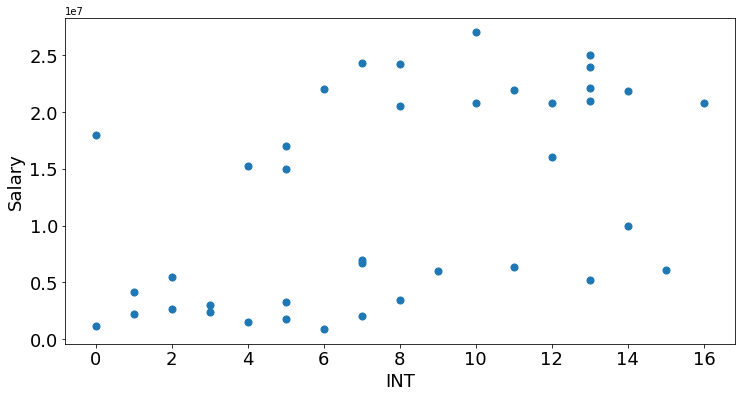

In [5]:
ax = qbs.plot(kind="scatter", x = 'INT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('INT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['INT', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 6.26279655e-17, -2.27738056e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.21397926, -0.6047327 ],
       [-1.27787291, -1.06298711],
       [-0.53031726,  0.81712001],
       [ 1.03778769,  1.08440433],
       [-0.22575755, -0.94282251]])

In [11]:
km.predict(X)

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4,
       2, 4, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,INT,INT_rank,salary,clusters
0,Sam Bradford,0,2.5,18000000,2
1,Geno Smith,0,2.5,1200000,1
2,Landry Jones,1,7.0,2200000,1
3,Patrick Mahomes,1,7.0,4106447,1
4,Matt Cassel,2,10.5,2625000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.32500000e+01, 6.88875400e+06],
       [2.00000000e+00, 2.81012637e+06],
       [5.37500000e+00, 1.95437500e+07],
       [1.24545455e+01, 2.19226757e+07],
       [6.75000000e+00, 3.87963412e+06]])

In [14]:
qbs.groupby('clusters')[['INT', 'salary']].mean()

,INT,salary
clusters,,
0,13.250000,6.888754e+06
1,2.000000,2.810126e+06
2,5.375000,1.954375e+07
3,12.454545,2.192268e+07
4,6.750000,3.879634e+06


In [15]:
centroids = qbs.groupby('clusters')[['INT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

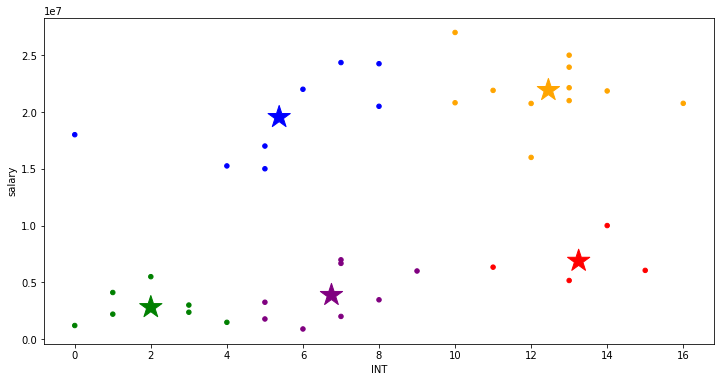

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'INT', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'INT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

8.646290090614484

In [18]:
silhouette_score(X, km.labels_)

0.4928777885091905